# Predicting Wine Quality: 
**By:** 
- Nikki de Vries
- Saul Gonzalez 
- Stephen Spivey

# The Goal: 
- Find drivers of wine quality for the california wine insitiute. 
- Based on the drivers, utilize clusters to make a regression model to predict wine quality.

# Initial Questions:
1. Are any of the features correlated? Can I apply some sort of feature selection?
2. Should I look at the top 'x' best and bottom 'x' worst wines for comparison? Is that a way to gain perspective?
3. What features would make good clusters? Should I use a heatmap?
4. Classification or regression? Should I do both for a comparison given the time I have to work on this?
5. Are all input variables relevant?

# Project Outline: 
1. Data Acquisition: 
    -  Acquire the data from: https://data.world/food/wine-quality
2. Data Preparation:
    - Combined the white and red csv's into a since csv
    - Clean the column data types
    - Investigate missing values
    - Investigate outliers
3. Data Exploration: 
    - Analyze the Uni/Bi/Multivariate variables to see how features interact. 
    - Use clustering to explore the data:
    - Conduct hypothesis testing
    - Correlation testing
4. Modeling: 
    - Create 4 modules based on the clusters and features discovered
5. Presentation:
    - 5 minute storytelling presentation based on drivers of wine quality

### Imports

In [1]:
# envivormental imports:
import final_wrangle as wr
import final_explore as ex
import Final_Modeling as mod

#core imports: 
import numpy as np
import pandas as pd
from scipy import stats 


#visualizations:
import matplotlib.pyplot as plt
import seaborn as sns

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# Acquire: 
- Data was imported from the wine quality link and converted into a single dataframe. 
- An additional column was created: wine_color for distinction between white and red wines.

In [2]:
# import the wine dataframe: 
df = wr.wine_df()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Data Preparation: 
- Steps taken to clean the data: 
    - Remove outliers. Removing the outliers with a K = 3 will remove 5 % of the data. 
    - Change the wine_color column to be numerical. 1 indicates red while 0 indicates white.
    - Change column names to have underscores for spaces.
    - Make all the data types the same.
    - Split the data

In [3]:
# clean the data
clean_df = wr.clean_wine(wr.wine_df())

In [4]:
# remove the outliers
clean_df = wr.remove_outliers(clean_df, 3)

In [5]:
clean_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,is_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,1.0


In [6]:
# split the data into train, validate, and test:
target = 'quality'
train, validate, test = wr.split_data(clean_df, target)

# Explore:
- Explore the Uni/Bi/Multivariate variables
- Produce 3 Hypothesis tests
- Produce 3 clusters
- Summarize key features and takeaways

## 1. Does quality differ across wine color? 
$H_0$: There is no difference in the mean quality of red vs white wine color. <br>
$H_a$: There is a difference in the mean quality of red vs white wine color.

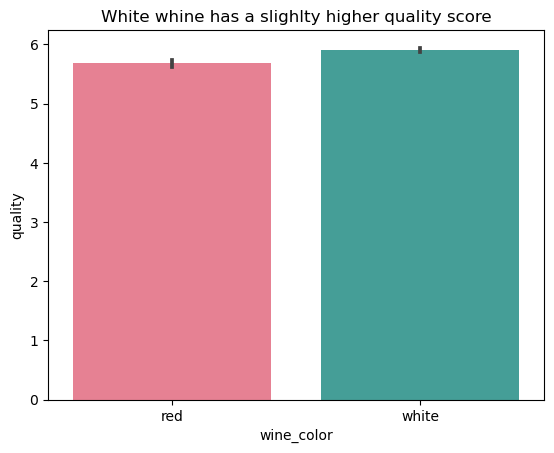

In [7]:
# create vizualization
sns.barplot(x = 'wine_color', y = 'quality', data = train, palette = 'husl')
plt.title('White whine has a slighlty higher quality score')
plt.show()

> The wine colors are: 0.0 = White, 1.0 = Red.

The type of test: Categorical vs Continous is a Comparison on Means test. <br>
**Assumptions:** <br>
- Normaly Distributed: Quality is not normally distributed.
- Subpop vs subpop = Mann Whitneyu test.

In [8]:
# complete the test: 
red = train[train.wine_color == 'red'].quality
white = train[train.wine_color == 'white'].quality

stat, p_val = stats.mannwhitneyu(red, white)
if p_val < 0.05:
    print('We can reject the null hypothesis; the means are different.')
    print(f'P_value: {p_val}')
else:
    print('We cannot reject the null hypothesis')

We can reject the null hypothesis; the means are different.
P_value: 3.584515576519506e-12


> White wine tends to have a higher quality compared to red wine. This could be a good feature to look at.

## 2. Is there a relationship between quality and alcohol?
$H_0$: There is no monotonic relationship between quality and alcohol. <br>
$H_a$: There is a monotonic relationship between quality and alcohol.

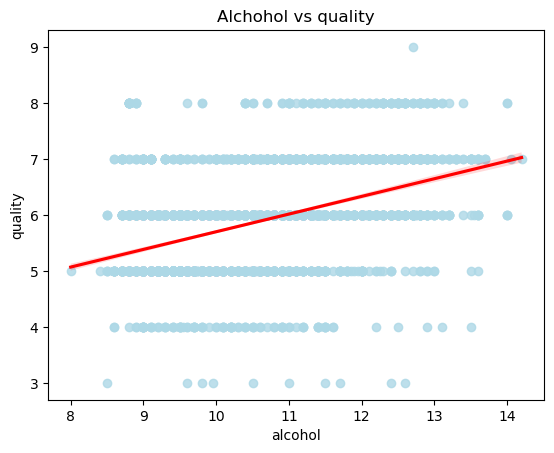

In [9]:
# graph: 
sns.regplot(data = train, x = 'alcohol', y = 'quality', line_kws={'color':'red'}, color = 'lightblue')
plt.title('Alchohol vs quality')
plt.show()

The type of test: Continuous vs Continuous is a Correlation test. <br>
**Assumptions:** <br>
- Normally Distributed: Quality is not normally distributed
- Subpop vs subpop = Spearman's r

In [10]:
#complete a spearmans test: 
r, p = stats.spearmanr(train['alcohol'], train.quality)
ex.eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.438994.
P-value: 1.9826706494849643e-162


> There appears to be a relationship between wine quality and alcohol content. It looks like as alcohol content increases, so does wine quality!

# 3. Is there a relationship between quality and chlorides?
$H_0$: There is no monotonic relationship between quality and chlorides. <br>
$H_a$: There is a monotonic relationship between quality and chlorides.

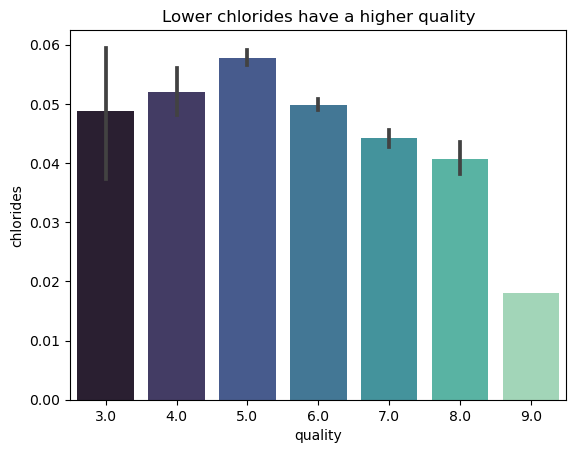

In [11]:
#graph: 
sns.barplot(x = 'quality', y = 'chlorides', data = train, palette = 'mako')
plt.title('Lower chlorides have a higher quality')
plt.show()

In [12]:
# complete a spearmans r test: 
r, p = stats.spearmanr(train['chlorides'], train.quality)
ex.eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.281351.
P-value: 9.401498914241552e-64


# Clustering: 
- Features that may have potential clusters: 
    - Alcohol vs Sulphates
    - Free sulfur dioxide vs Total sulfur dioxide
    - Volatile acidity vs density
    - Citric Acid vs pH

## Cluster 1

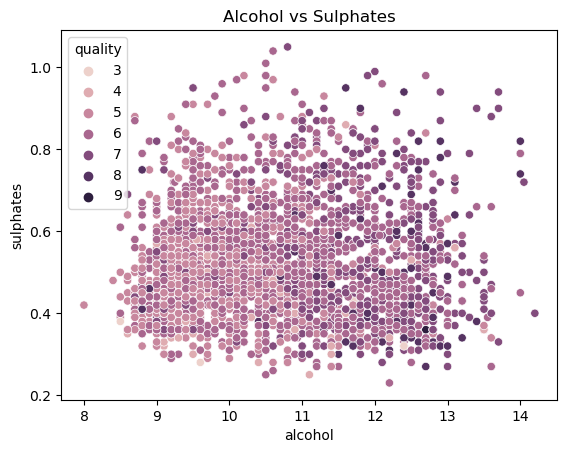

In [13]:
# create the cluster: 
sns.scatterplot(x = 'alcohol', y = 'sulphates', data = train, hue = 'quality')
plt.title('Alcohol vs Sulphates')
plt.show()

> There is a trend in the clusters: As alcohol is over 11 there seems to be a higher percentage in quality. <br>
> The number of clusters are 4

## Cluster 2

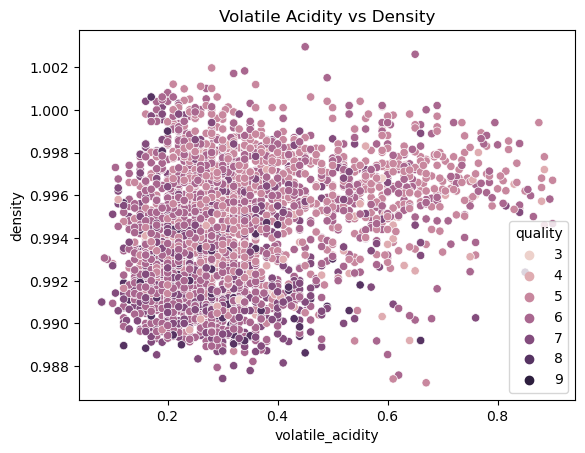

In [14]:
sns.scatterplot(x = 'volatile_acidity', y = 'density', data = train, hue = 'quality')
plt.title('Volatile Acidity vs Density')
plt.show()

> As volatile acidity and density decreases there seems to be a increase in quality of the wine. Vise Versa as density increases a volatile acidity increases the quality decreases. <br>
> There are 4 clusters.

# Cluster 3

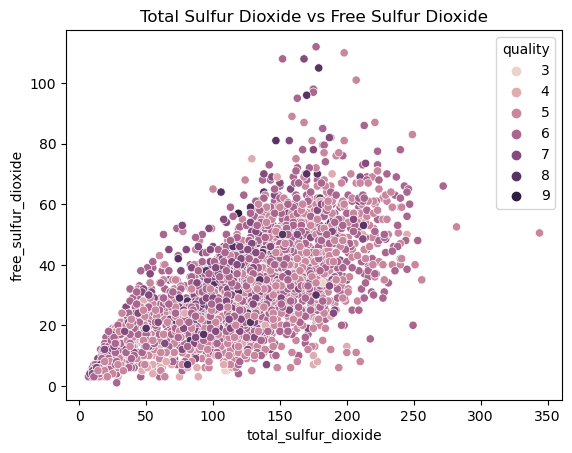

In [15]:
sns.scatterplot(x = 'total_sulfur_dioxide', y = 'free_sulfur_dioxide', data = train, hue = 'quality')
plt.title('Total Sulfur Dioxide vs Free Sulfur Dioxide')
plt.show()

> As free sulfur dioxide and total sulfur dioxide increase it looks quality increases. The lower quality wines tend to stay around lower free sulfur dioxide. <br>
> 

# Explore Summary: 
- Features impact wine quality are: 
    - Wine Color
    - Chlorides
    - Alcohol
- Features with the biggest correlation (based on heatmap): 
    - Alcohol (0.45)
- Features with medium correlation (based on heatmap):
    - Sulphates (0.27) 
    - Citric Acid (0.089)
    - Free Sulfur Dioxide (0.063)
    - pH (0.0062)
- Features with lowest correlation (based on heatmap): 
    - Residual sugar (-0.036)
    - Total sulfur dioxide (-0.039)
    - Fixed acidity (-0.065)
    - Chlorides (-0.2)
    - Volatile Acidity (-0.27)
    - Density (-0.31)
 
 
 
**Features used in modeling will be**
1. Wine Color: There is some significance.
2. Chlorides: There is some significance.
3. Clustering of Alcohol and Sulphates: There are noticable clusters.
4. Clustering of Citric Acid and pH: There are noticable clusters.
5. Clustering of Free Sulfur Dioxide and Total Sulfur Dioxide. There are noticable clusters. 
6. Volatile Acidity and Density: There are noticable clusters.

# Preprocessing: 
- Drop categorical columns 
- Scale the data

In [16]:
# drop column: 
del clean_df['wine_color']
del train['wine_color']
del validate['wine_color']
del test['wine_color']

In [17]:
# scale the data: 
to_scale = list(clean_df.columns)
train, validate, test = wr.scale_data(train, validate, test, to_scale)

# Modeling Clustering:

<b>Citric Acid vs pH

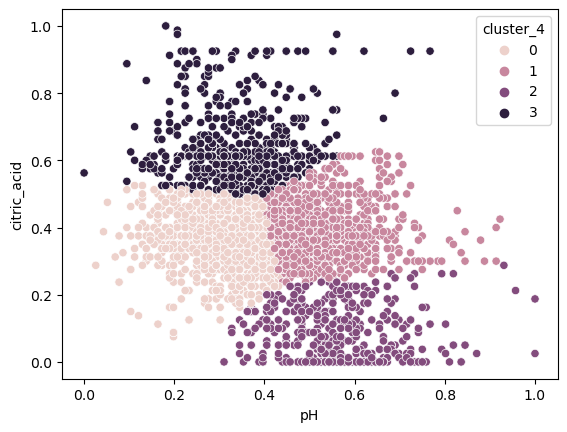

In [18]:
train, validate, test = mod.cluster_4(train, validate, test, features=['citric_acid', 'pH'], n_clusters=4)

<b>Total Sulfur Dioxide vs Free Sulfur Dioxide

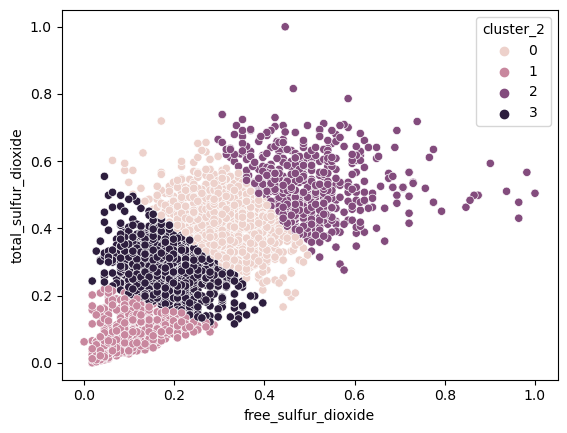

In [19]:
train, validate, test = mod.cluster_2(train, validate, test, features=['free_sulfur_dioxide', 'total_sulfur_dioxide'], n_clusters=4)

<b>Sulphates vs Alcohol

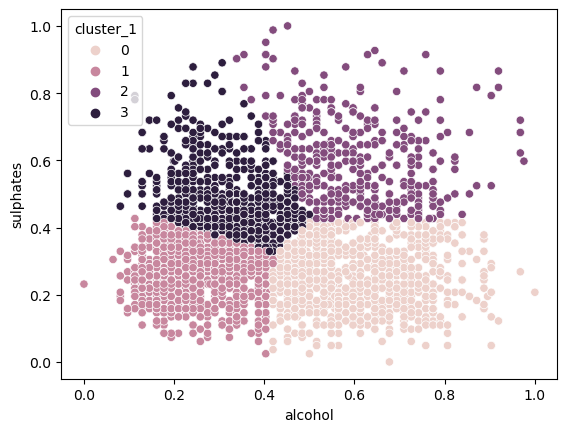

In [20]:
train, validate, test = mod.cluster_1(train, validate, test, features=['alcohol', 'sulphates'], n_clusters=4)

<b>Volatile Acidity vs Density

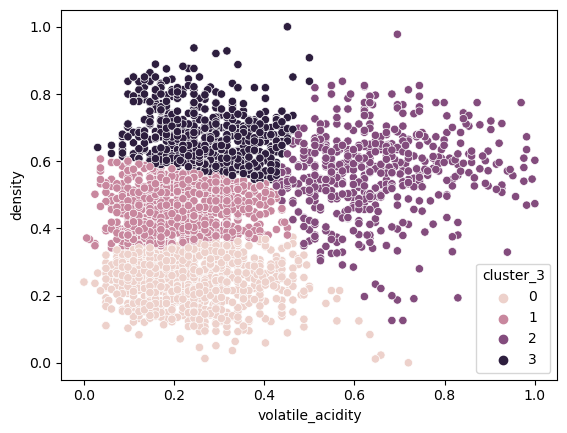

In [21]:
train, validate, test = mod.cluster_3(train, validate, test, features=['volatile_acidity', 'density'], n_clusters=4)

# Modeling:
These are the clusters that we chose:
- Citric Acid and pH
- Total Sulfur Dioxide and Free Sulfur Dioxide
- Sulphates and Alcohol
- Volatile Acidity and Density

We chose these features as clusters due to their correlation to the target 'quality' and their correlation with each other.
caveat: these are the features that we selected to go into modeling with

The features selected to go into the modeling were:

- Wine Color
- Chlorides
- Clustering of Alcohol and Sulphates
- Clustering of Citric Acid and pH
- Clustering of Free Sulfur Dioxide and Total Sulfur Dioxide
- Volatile Acidity and Density

We chose to go with regression modeling due to all of our features being continuous. Classification was eliminated as a choice due to this factor.

We used the following regression models:
- Ordinary Least Squares (OLS)
- LassoLars
- Generalized Linear Model (GLM)

In [22]:
wr.get_baseline
baseline, baseline_rmse, baseline_r2 = wr.get_baseline(train)
#'Red Wine'= 1, 'White Wine'= 0
baseline, baseline_rmse, baseline_r2

(0.4766531322505799, 0.14409570744011235, 0.0)

In [23]:
X_train, y_train, X_val, y_val, X_test, y_test = wr.break_em_out(train, validate, test)

<h2><b>Comparison of the Regression Models

<b><h3>Model 1: Ordinary Least Squares (OLS)

In [24]:
wr.OLS(X_train, y_train, baseline, X_val, y_val)

OLS Regressor 
RMSE_train 0.1213603076654974 
RMSE_validate 0.11975550376112691 
R2_validate 0.3287261097612937


<b><h3>Model 2: LassoLars

In [25]:
wr.LassoLars(X_train, y_train, baseline, X_val, y_val)

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 0.14409570744011235, 
Validation/Out-of-Sample:  0.14598808502798719
Difference:  0.0018923775878748328


<b><h3>Model 3: Generalized Linear Model (GLM)

In [26]:
wr.GLM(X_train, y_train, baseline, X_val, y_val)

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 0.13929122588167925, 
Validation/Out-of-Sample:  0.14120504435615044
Difference:  0.0019138184744711961


<b><h2>Final Best Model on Test Data - OLS Model

In [27]:
wr.OLS_test(X_train, y_train, baseline, X_val, y_val, X_test, y_test)

RMSE for Ordinary Least Squares Test Model
_____________________________________________
Baseline: 0.4766531322505799
Training/In-Sample:  0.1213603076654974 
Validation/Out-of-Sample:  0.11975550376112691
Test/Out-of-Sample: 0.11768176282636392
difference:  -0.0020737409347629937


<b>OLS Model is the best performing model with an approximately average model prediction error of 12% on unseen data.

<b><h2>Summary

<b>After acquiring & preparing the data, we conducted uni/bi/multi-variate exploration on the wine data to look at features and how they might impact the target 'quality'.

<b>We paired various features together and used clustering to observe potential relationships between the features.
     
<b>The results of our data exploration culminated in the resulting clusters and features being selected to go into regression modeling:

- Wine Color
- Chlorides
- Clustering of Alcohol and Sulphates
- Clustering of Citric Acid and pH
- Clustering of Free Sulfur Dioxide and Total Sulfur Dioxide
- Volatile Acidity and Density

<b>We chose to go with regression modeling due to all of our features being continuous. 

<b>We used the following regression models:
- Ordinary Least Squares (OLS)
- LassoLars
- Generalized Linear Model (GLM)

<b>We found that our Ordinary Least Squares model was the best performing model, showcasing a 12% average model prediction error on unseen data.

<b><h2>Next Steps

<b>The nexts steps would be to look at conducting this entire study without the use of clustering, using the same models, to compare results and observe the impact of clustering to the modeling results.

<b>Furthermore, additional study on features for both red and white wines 'individually', given sufficient time, could prove insightful in determining the best drivers of quality for each colored wine.
    
<b>Lastly, if there happens to be additional data that becomes available, it could prove useful as there are likely other outside features that contribute to wine quality (grape quality, climate grapes grown, fermentation process, etc.) that could be stronger drivers of quality not provided by our current data source.
    

<b><h2>Recommendations

<b>The data source showed a larger percentage of white wines produced compared to red wines, which could have produced a bias in the data that skewed the data. The data could be reduced to even out the differences between red and wines. 
    
<b>There could be an issue with oxidation in the wines. The lower quality wines have lower amounts of sulphates, and we think that by increasing the amount of sulphates, the oxidation issues would be remedied and improve the quality of wines. 
        
<b>Higher alcohol content is a major factor in the higher quality wines, specifically white wines. A two-fold effort can be enacted to maximize marketing towards white wine (where high quality is aplenty) and to chemically increase the alcohol while balancing the acidity to sufficiently improve quality in the red wines. 